In [41]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu 
import seaborn as sns 
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [42]:
df_original = pd.read_csv('Desktop/Thinkful/states_all.csv')
df_original.head(30)

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


## Assignment
In this assignment, you'll be working with the U.S. Education Dataset from Kaggle. The data gives detailed state level information on several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, click the Kaggle link above.

- Determine all the variable types and find the fraction of the missing values for each variable.
- Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?
- Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.
- This time, fill in the missing values using interpolation (extrapolation).
- Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

## 1. Determine all the variable types and find the fraction of the missing values for each variable.

In [43]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

1) dtypes: float64(22), int64(1), object(2)

detecting missing values

In [44]:
df_original.isnull()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


let's calculate the percentages of the missing values in all columns:

In [45]:
df_original.isnull().sum()*100/df_original.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 2. Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?

In [46]:
# Make copy of dataframe
df1 = df_original.copy()
# Create a list of all columns we want to work on.
fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]
# Fill in all missing values from the column with the average of the same column

for i in fill_list:
    df1[i].fillna(df1[i].mean(), inplace = True)

In [52]:
df1

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,57948.000000,58025.000000,41167.00000,4.715640e+05,1.963860e+05,6.761740e+05,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,915930.820993,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,...,9748.000000,8789.000000,6714.00000,7.911700e+04,3.084700e+04,1.123350e+05,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,...,55433.000000,49081.000000,37410.00000,4.371270e+05,1.752100e+05,6.148810e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,...,34632.000000,36011.000000,27651.00000,2.813380e+05,1.231130e+05,4.052590e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.000000,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,915930.820993,3.185173e+06,1.632530e+05,1.307986e+06,1.713934e+06,3.264826e+06,1.642466e+06,...,50648.000000,45025.000000,34533.00000,3.949040e+05,1.602990e+05,5.626130e+05,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,915930.820993,3.834302e+06,1.435420e+05,1.342539e+06,2.348221e+06,3.721338e+06,2.148041e+06,...,38058.000000,33691.000000,28366.00000,3.042840e+05,1.269170e+05,4.369320e+05,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,915930.820993,6.452330e+05,4.594500e+04,4.209420e+05,1.783460e+05,6.387840e+05,3.727220e+05,...,8272.000000,8012.000000,6129.00000,6.749500e+04,2.833800e+04,9.629600e+04,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,915930.820993,7.094800e+05,6.474900e+04,0.000000e+00,6.447310e+05,7.428930e+05,3.291600e+05,...,5832.000000,5000.000000,3433.00000,4.700900e+04,1.817300e+04,7.000000e+04,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,915930.820993,1.150630e+07,7.884200e+05,5.683949e+06,5.033930e+06,1.130564e+07,5.166374e+06,...,164416.000000,142372.000000,100835.00000,1.276685e+06,5.115570e+05,1.819706e+06,213.689751,259.908848,204.882606,262.118986


## 3. Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year.

In [47]:
df2 = df_original.copy()
years = df2["YEAR"].unique() 

for col in fill_list:
    for year in years: 
        if len(df2.loc[df2["YEAR"] == year][col].unique())==1: 
            #col value is all null for that year, then fill it with 0 
            df2.loc[df2["YEAR"] == year,  col]= df2.loc[df2["YEAR"] == year,  col].fillna(0)
        else: 
            df2.loc[df2["YEAR"] == year,  col] = df2.loc[df2["YEAR"] == year, col].fillna(df2[(df2["YEAR"] == year) & (df2[col].isnull()==False) ][col].mean())

In [53]:
df2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,0.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,0.0,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,0.0,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,0.0,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,0.0,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [48]:
df2.isnull().sum()*100/df2.isnull().count()

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

## 4. This time, fill in the missing values using interpolation (extrapolation).

In [59]:
df3 = df_original.copy()

for col in fill_list:
    df3.loc[:, col].interpolate(inplace=True)


In [60]:
df3

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


## 5. Compare your results for the 2nd, 3rd, and 4th questions. Do you find any meaningful differences?

In [61]:
for col in fill_list:
    print("Statistics for columns: {}".format(col))
    print(pd.concat([df_original[col], df1[col],
                     df2[col], df3[col]], axis=1).describe())

Statistics for columns: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.492000e+03  1.441000e+03
mean   9.159308e+05  9.159308e+05  8.504619e+05  7.950835e+05
std    1.065280e+06  9.667725e+05  9.953496e+05  1.025901e+06
min    4.386600e+04  4.386600e+04  0.000000e+00  4.386600e+04
25%    2.583140e+05  3.150940e+05  1.964048e+05  1.306530e+05
50%    6.483130e+05  8.204140e+05  6.706125e+05  4.965130e+05
75%    1.014528e+06  9.211780e+05  9.486075e+05  9.427380e+05
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for columns: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.492000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   8.773592e+06   8.090707e+06
std     1.174519e+07   1.087818e+07   1.103474e+07   1.115317e+07
min     4.656500e+05   4.656500e+05   0.000000e+00   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.189

          GRADES_4_G     GRADES_4_G     GRADES_4_G     GRADES_4_G
count    1361.000000    1492.000000    1492.000000    1492.000000
mean    64538.927259   64538.927259   60174.471778   59167.589142
std     80293.387625   76684.998585   78400.588521   78628.082406
min       633.000000     633.000000       0.000000     633.000000
25%     13739.000000   15195.500000   10372.750000    9741.500000
50%     43272.000000   49884.500000   40164.000000   37152.000000
75%     75481.000000   71814.250000   71814.250000   71814.250000
max    493415.000000  493415.000000  493415.000000  493415.000000
Statistics for columns: GRADES_8_G
          GRADES_8_G     GRADES_8_G     GRADES_8_G     GRADES_8_G
count    1361.000000    1492.000000    1492.000000    1492.000000
mean    64271.057311   64271.057311   59933.729429   58899.899129
std     78910.545776   75364.301721   77095.833792   77339.999656
min       437.000000     437.000000       0.000000     437.000000
25%     13342.000000   15682.750000   105

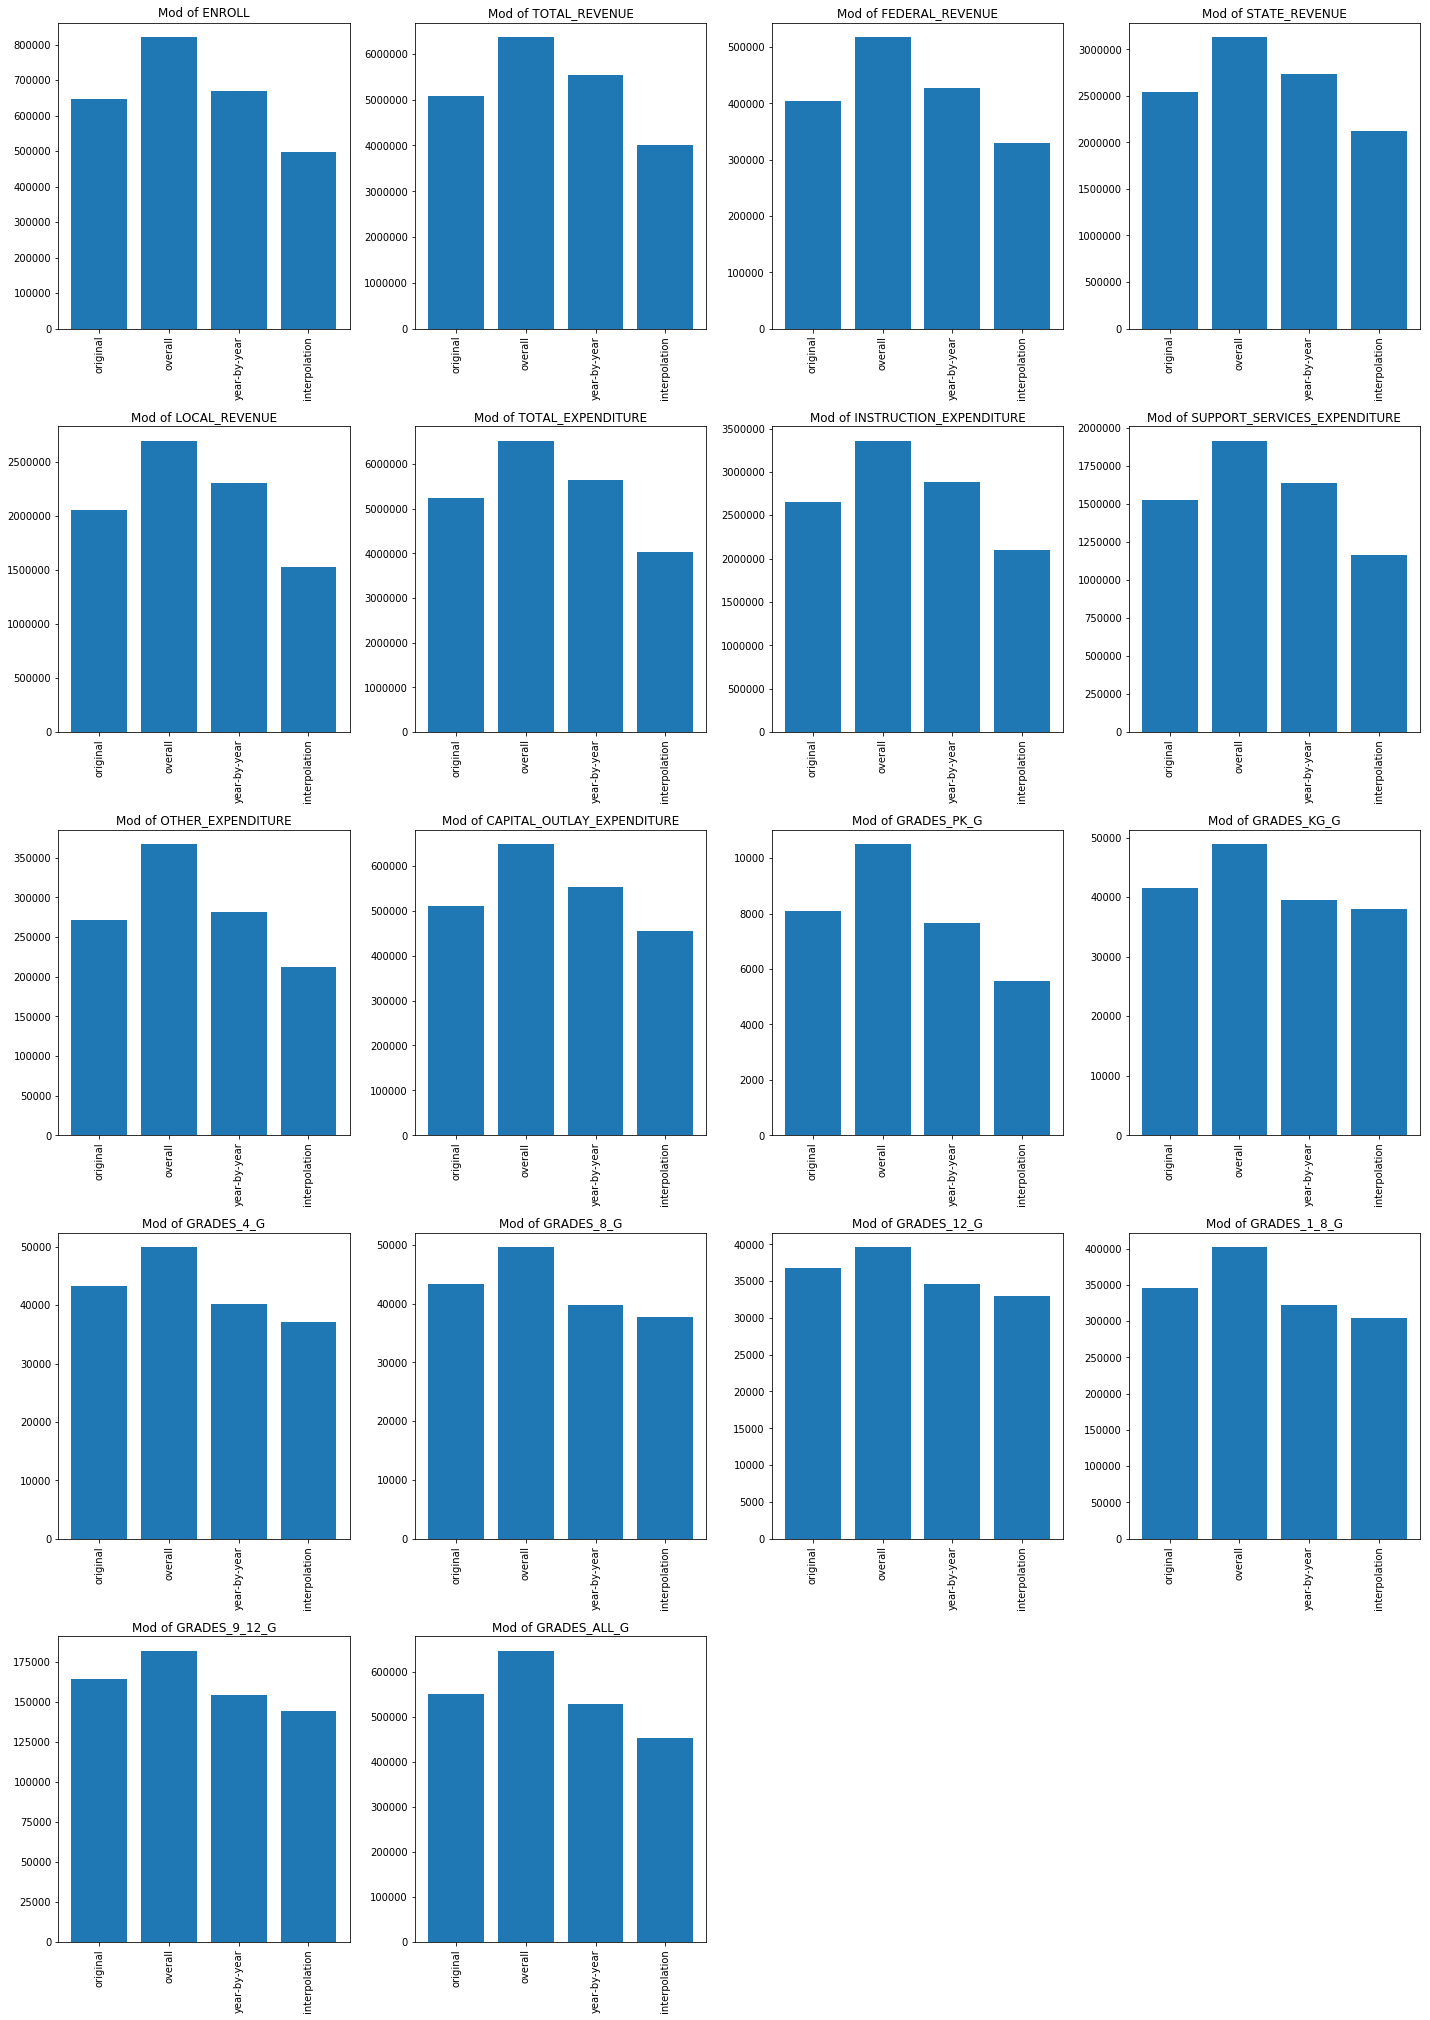

In [62]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([df_original[col], df1[col],
                     df2[col], df3[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.xticks(rotation='vertical')
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()